In [38]:
import os
import pandas as pd
from sqlalchemy import create_engine
import psycopg2
from dotenv import load_dotenv
import urllib.parse
load_dotenv()
POSTGRES_USERNAME = os.environ.get('JDB_USER')
POSTGRES_PASSWORD = os.environ.get('JDB_PASSWORD')
POSTGRES_ADDRESS = os.environ.get('JDB_HOST')
POSTGRES_PORT = 5432
POSTGRES_DBNAME = os.environ.get('JDB_NAME')
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=POSTGRES_USERNAME, password=POSTGRES_PASSWORD, ipaddress=POSTGRES_ADDRESS, port=POSTGRES_PORT, dbname=POSTGRES_DBNAME))
cnx = create_engine(postgres_str)


This is where this is documentation, in particular, level map:

Level|Misdemeanor Description| |Level|Felony Description| |Level |Misc Description|
:-----|:-----------| |:-----|:-----------| |:---------|:-----------|
1|Class 3| |5|Class I| |-1|NONE|
2|Class 2| |6|Class H| |-2|5305|
3|Class 1| |7|Class G| |-3|??|
4|Class A1| |8|Class F| | |
|| |9|Class E| | | |
|| |10|Class D| | | |
|| |11|Class C| | | |
|| |12|Class B1| | | |
|| |13|Class B2| | | |
|| |14|Class A| | | |


In [39]:
stays = pd.read_sql_query('''SELECT * FROM jaildata.stays_summary;''', cnx)
stays

,defendant_id,name,gender,race,start_date,end_date,days,min_level,max_level,has_violation,violent,dwi,flag,not_primary_custodian
0,31761,"PRESTWOOD, ZACHARY TYLER",M,W,2022-02-24,2022-02-24,1.0,-3,4,0,1,0,0,0
1,26031,"TRAVIS, CHRISTOPHER ADAM",M,W,2022-02-11,2022-02-15,5.0,0,2,1,0,0,0,0
2,28218,"PETERS, BRYSON JOSIAH",M,W,2022-02-16,2022-02-18,3.0,11,12,0,1,0,0,0
3,39793,"KARRICK, LUKE MICHAEL",M,W,2022-03-15,2022-03-19,5.0,0,0,0,0,0,0,1
4,41422,"HERNANDEZ, ERMENEGILDO ESPINOZA",M,W,2022-03-19,2022-03-22,4.0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,8316,"BLACK, MICHAEL ANTHONY",M,W,2022-01-04,2022-01-27,24.0,0,0,1,0,0,0,0
890,20296,"WEEKS, JERRY ALLEN",M,W,2022-01-29,2022-02-10,13.0,3,3,0,0,0,0,0
891,27540,"DAVIS, LOGAN WILLIAM",M,W,2022-02-15,2022-02-18,4.0,1,3,0,0,0,0,0
892,31200,"KELLER, TIMOTHY SKYLER",M,W,2022-02-23,2022-02-23,1.0,3,3,0,0,0,0,0


In [40]:
s0 = stays.groupby("days")["days"].count()
s1 = s0.sort_values(ascending = False)
s2 = s1.iloc[:7].copy()
s2 = s2.sort_index()
gtw = pd.DataFrame([[s1.iloc[7:].sum()]], index=['8+'])
s2 = pd.concat([s2,gtw])
s2

,0
1.0,293
2.0,104
3.0,77
4.0,48
5.0,50
6.0,37
7.0,37
8+,248


In [12]:
import matplotlib.pyplot as plt

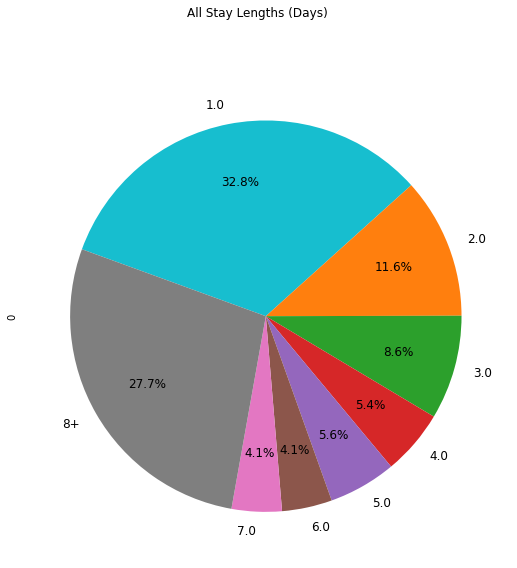

In [41]:
pie_colors=['tab:cyan', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple',
            'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:blue', ]
fig = s2.plot.pie(subplots=True, title="All Stay Lengths (Days)", counterclock=False, 
                  legend=False, autopct='%1.1f%%', pctdistance=.7, figsize=[9,9],
                  startangle=160, colors=pie_colors, fontsize=12)


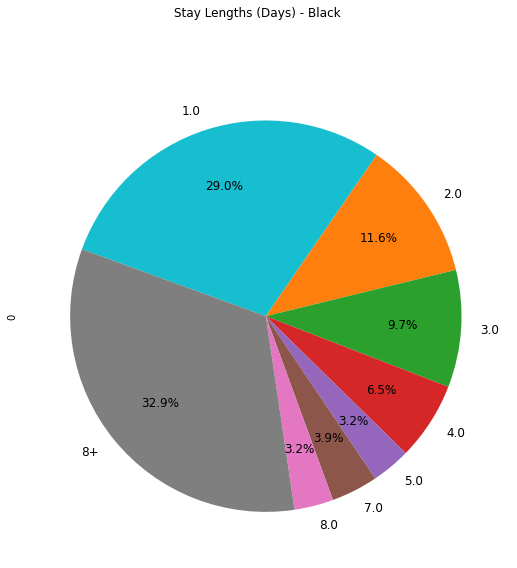

In [42]:
s0 = stays.loc[stays["race"] == "B"].groupby("days")["days"].count()
s1 = s0.sort_values(ascending = False)
s2 = s1.iloc[:7].copy()
s2 = s2.sort_index()
gtw = pd.DataFrame([[s1.iloc[7:].sum()]], index=['8+'])
s2 = pd.concat([s2,gtw])
fig = s2.plot.pie(subplots=True, title="Stay Lengths (Days) - Black", counterclock=False, 
                  legend=False, autopct='%1.1f%%', pctdistance=.7, figsize=[9,9],
                  startangle=160, colors=pie_colors, fontsize=12)

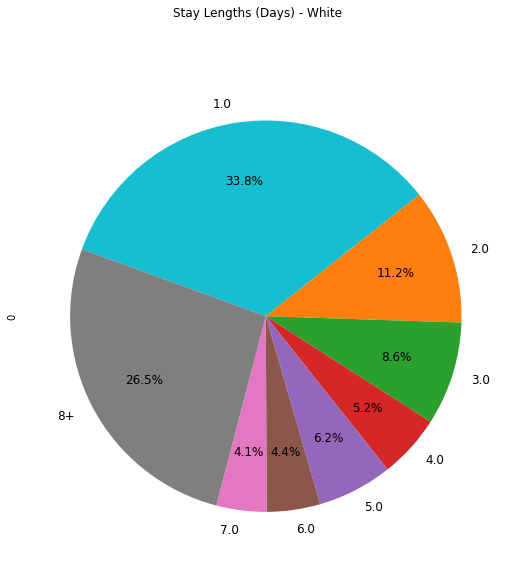

In [43]:
s0 = stays.loc[stays["race"] == "W"].groupby("days")["days"].count()
s1 = s0.sort_values(ascending = False)
s2 = s1.iloc[:7].copy()
s2 = s2.sort_index()
gtw = pd.DataFrame([[s1.iloc[7:].sum()]], index=['8+'])
s2 = pd.concat([s2,gtw])
fig = s2.plot.pie(subplots=True, title="Stay Lengths (Days) - White", counterclock=False, 
                  legend=False, autopct='%1.1f%%', pctdistance=.7, figsize=[9,9],
                  startangle=160, colors=pie_colors, fontsize=12)